Section 1:
Importing Libraries and Downloading NLTK Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import re

Explanation:

**Pandas (pd)**: Used for data manipulation and analysis, providing data structures like DataFrame.

**NumPy (np)**: Provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

**Matplotlib (plt)**: A plotting library for creating static, animated, and interactive visualizations in Python.

**Seaborn (sns)**: Built on top of Matplotlib, it provides a high-level interface for drawing attractive and informative statistical graphics.

**Scikit-learn**: A machine learning library:

--train_test_split: Splits arrays or matrices into random train and test subsets.

--GridSearchCV: Performs an exhaustive search over specified parameter values for an estimator.

--TfidfVectorizer, CountVectorizer: Convert a collection of raw documents to a matrix of TF-IDF features or token counts.

--LogisticRegression: Implements logistic regression.

--LabelEncoder: Encodes target labels with value between 0 and n_classes-1.

--accuracy_score, classification_report, confusion_matrix: Provide metrics to evaluate model performance.

**Imbalanced-learn (SMOTE):** A library for dealing with imbalanced datasets by over-sampling the minority class.

**NLTK:** Natural Language Toolkit, used for working with human language data (text).

--stopwords, word_tokenize, WordNetLemmatizer: Used for text preprocessing.

--nltk.download: Downloads necessary datasets/models for NLTK.

**Regular Expressions (re)**: Used for string matching and manipulation.
NLTK Downloads:


--'punkt': Contains pre-trained tokenizers.

--'stopwords': Contains lists of common stopwords in various languages.

--'wordnet': A lexical database for the English language.

Section 2: Loading and Cleaning the Dataset:


In [ ]:
# Load the dataset
df = pd.read_csv('/content/HateSpeechDetection (1).csv')

# Data Cleaning
df['Comment'] = df['Comment'].str.replace('[^a-zA-Z\s]', '', regex=True).str.lower()
df.head()


,Platform,Comment,Hateful
0,Reddit,damn i thought they had strict gun laws in ger...,0
1,Reddit,i dont care about what it stands for or anythi...,0
2,Reddit,its not a group its an idea lol,0
3,Reddit,so its not just america,0
4,Reddit,the dog is a spectacular dancer considering he...,0


Explanation:

**Loading the Dataset:** The CSV file is read into a pandas DataFrame, which holds the data in a tabular format.

**Data Cleaning**: The 'Comment' column is cleaned:

--Removing Non-Alphabetic Characters: Using regular expressions to remove any character that is not a letter or whitespace.

--Converting to Lowercase: Ensures uniformity by converting all characters to lowercase.

Section 3: Data Preprocessing


In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
# Data Preprocessing
df['tokenized_text'] = df['Comment'].apply(word_tokenize)
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Platform,Comment,Hateful,tokenized_text
0,Reddit,damn i thought they had strict gun laws in ger...,0,"[damn, i, thought, they, had, strict, gun, law..."
1,Reddit,i dont care about what it stands for or anythi...,0,"[i, dont, care, about, what, it, stands, for, ..."
2,Reddit,its not a group its an idea lol,0,"[its, not, a, group, its, an, idea, lol]"
3,Reddit,so its not just america,0,"[so, its, not, just, america]"
4,Reddit,the dog is a spectacular dancer considering he...,0,"[the, dog, is, a, spectacular, dancer, conside..."


Tokenization: The 'Comment' column is tokenized using the word_tokenize function from NLTK. This splits each comment into a list of words, which is useful for further text processing.

**Section 4: Label Encoding**

In [ ]:
# Label Encoding
label_encoder = LabelEncoder()
df['Platform_encoded'] = label_encoder.fit_transform(df['Platform'])
df.head()


,Platform,Comment,Hateful,tokenized_text,Platform_encoded
0,Reddit,damn i thought they had strict gun laws in ger...,0,"[damn, i, thought, they, had, strict, gun, law...",1
1,Reddit,i dont care about what it stands for or anythi...,0,"[i, dont, care, about, what, it, stands, for, ...",1
2,Reddit,its not a group its an idea lol,0,"[its, not, a, group, its, an, idea, lol]",1
3,Reddit,so its not just america,0,"[so, its, not, just, america]",1
4,Reddit,the dog is a spectacular dancer considering he...,0,"[the, dog, is, a, spectacular, dancer, conside...",1


Explanation:

Label Encoding: The 'Platform' column, which contains categorical data, is converted into numerical values using LabelEncoder. This is necessary for machine learning algorithms which typically require numerical input.

**Section 5: Count Vectorization**

In [ ]:
# Count Vectorization
count_vectorizer = CountVectorizer(max_features=5000)
comments_count = count_vectorizer.fit_transform(df['Comment']).toarray()
comments_count_df = pd.DataFrame(comments_count, columns=count_vectorizer.get_feature_names_out())
df.head()
comments_count_df.head()


,aaaa,ab,abdul,ability,able,abort,aborted,abortions,abos,about,...,zayns,zealand,zero,zipped,zipper,zoe,zombie,zone,zonked,zoology
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Explanation:

Count Vectorization: The CountVectorizer converts the 'Comment' column into a matrix of token counts. Each row represents a document, and each column represents a token. The value in each cell is the count of the token in the corresponding document.

DataFrame Creation: The resulting matrix is converted into a DataFrame for easier manipulation.

**Section 6: Combining Features**

In [ ]:
# Combine all features into a single DataFrame
encoded_data = pd.concat([comments_count_df, df['Platform_encoded']], axis=1)
encoded_data['Hateful'] = df['Hateful']



Explanation:

Combining Features: The token count features and the encoded 'Platform' feature are combined into a single DataFrame. The 'Hateful' column is added as the target variable.

**Section 7: Handling Data Imbalance with SMOTE**

In [ ]:
# Handling Data Imbalance with SMOTE
X = encoded_data.drop(columns=['Hateful'])
y = encoded_data['Hateful']

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


Explanation:

Splitting Data: The features (X) and target (y) are separated.

SMOTE: Synthetic Minority Over-sampling Technique (SMOTE) is applied to balance the dataset by generating synthetic samples for the minority class.

**Section 8: Splitting the Data**

In [ ]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)



Train-Test Split: The balanced dataset is split into training (80%) and test (20%) sets. This helps evaluate the model's performance on unseen data.

**Section 9: Model Selection with Logistic Regression**

In [ ]:
# Model Selection with Logistic Regression
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train.apply(lambda row: ' '.join(row.index[row > 0]), axis=1))
X_test_vec = vectorizer.transform(X_test.apply(lambda row: ' '.join(row.index[row > 0]), axis=1))

lr_model = LogisticRegression(max_iter=200)
lr_params = {'C': [0.01, 0.1, 1, 10, 100, 1000]}
lr_grid = GridSearchCV(lr_model, lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train_vec, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

Explanation:

TF-IDF Vectorization: Converts the text data into a matrix of TF-IDF features. This gives more weight to rare words.

Lambda Function: Converts each row of the training and test data back into a string for vectorization.

Logistic Regression: Initializes a logistic regression model.

Hyperparameter Tuning: Uses GridSearchCV to find the best hyperparameters for the logistic regression model by trying different values of the regularization parameter C.

**Section 10: Making Predictions and Evaluating the Model**

Logistic Regression Accuracy: 0.8958333333333334
Best Parameters: {'C': 10}
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       481
           1       0.88      0.91      0.90       479

    accuracy                           0.90       960
   macro avg       0.90      0.90      0.90       960
weighted avg       0.90      0.90      0.90       960



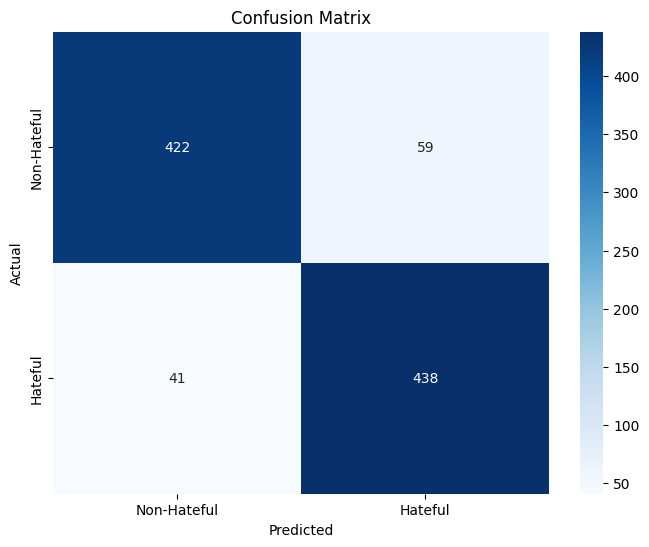

In [ ]:
# Make predictions
lr_predictions = lr_grid.predict(X_test_vec)

# Evaluate the Model
lr_accuracy = accuracy_score(y_test, lr_predictions)
print('Logistic Regression Accuracy:', lr_accuracy)
print('Best Parameters:', lr_grid.best_params_)
print(classification_report(y_test, lr_predictions))

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, lr_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hateful', 'Hateful'], yticklabels=['Non-Hateful', 'Hateful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Explanation:

Predictions: The model makes predictions on the test data.

Model Evaluation:

Accuracy Score: Computes the accuracy of the model.

Best Parameters: Displays the best parameters found by GridSearchCV.

Classification Report: Provides precision, recall, F1-score, and support for each class.

Confusion Matrix: Shows the true positives, true negatives, false positives, and false negatives.

Confusion Matrix Plot: Uses Seaborn to plot the confusion matrix as a heatmap.

**Section 11: Preprocessing and Predicting on New Texts**

In [ ]:
# Function to preprocess input text
def preprocess_input_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z\s]', '', text)
    tokenized_text = word_tokenize(text)
    return ' '.join(tokenized_text)

# Example texts
texts = [
    "I hope you have a great day!",  # Non-hateful
    "Your presentation was really impressive!",  # Non-hateful
    "You are so stupid and worthless!",  # Hateful
    "Shut up, nobody cares about your stupid opinions!",  # Hateful
    "You're a complete waste of space!",  # Hateful
]

# Process and predict for each text
for text in texts:
    preprocessed_text = preprocess_input_text(text)
    input_vec = vectorizer.transform([preprocessed_text])
    prediction = lr_grid.predict(input_vec)

    result = "hateful" if prediction[0] == 1 else "not hateful"
    print(f"Comment: {text}\nPrediction: {result}\n")


Comment: I hope you have a great day!
Prediction: not hateful

Comment: Your presentation was really impressive!
Prediction: not hateful

Comment: You are so stupid and worthless!
Prediction: hateful

Comment: Shut up, nobody cares about your stupid opinions!
Prediction: hateful

Comment: You're a complete waste of space!
Prediction: hateful



Explanation:


Preprocessing Function: A function to preprocess input text:

Lowercase Conversion: Converts the text to lowercase.

Removing Non-Alphabetic Characters:
Removes characters that are not letters or whitespace.

Tokenization: Splits the text into words.

Join Tokens: Joins the tokens back into a single string.

Example Texts: A list of example comments to test the model.

Prediction Loop: For each text:

Preprocess: The text is preprocessed.
Vectorize: The preprocessed text is transformed into TF-IDF features.

Predict: The model predicts whether the text is hateful or not.

Display Result: The result is printed.